In [1]:
%load_ext autoreload
%autoreload 2

from checkout import expected_carts_table, bin_exp_mean_dev
import numpy as np
import math
import pandas as pd

In [2]:
dp_carts = expected_carts_table(200, 20) # generate the table

In [3]:
carts_df = pd.DataFrame(dp_carts).iloc[2:21,:201]
compact_carts_df = carts_df.iloc[::2, ::20]
pd.options.display.float_format='{:,.3f}'.format
compact_carts_df
# print L=2...20, N=0...200

,0,20,40,60,80,100,120,140,160,180,200
2,0.000,8.238,17.493,26.923,36.443,46.021,55.639,65.288,74.962,84.655,94.365
4,0.000,2.896,7.004,11.290,15.705,20.190,24.714,29.282,33.887,38.507,43.147
6,0.000,1.342,3.768,6.416,9.172,11.991,14.859,17.765,20.702,23.662,26.640
8,0.000,0.666,2.272,4.103,6.040,8.046,10.099,12.191,14.304,16.441,18.600
10,0.000,0.249,1.437,2.792,4.247,5.768,7.341,8.940,10.573,12.228,13.897
12,0.000,0.056,0.919,1.953,3.094,4.307,5.562,6.839,8.151,9.488,10.833
14,0.000,0.007,0.584,1.392,2.312,3.296,4.324,5.384,6.470,7.577,8.696
16,0.000,0.000,0.304,0.989,1.765,2.577,3.430,4.318,5.233,6.169,7.123
18,0.000,0.000,0.127,0.727,1.322,2.015,2.762,3.520,4.300,5.104,5.929
20,0.000,0.000,0.042,0.478,1.005,1.612,2.220,2.892,3.580,4.274,4.993


In [4]:
# Data seems to match intuition. As number of lanes increases, E decreases, while as number of carts increases, E increases. 

In [5]:
# =============================================
#    Visualization
# =============================================

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


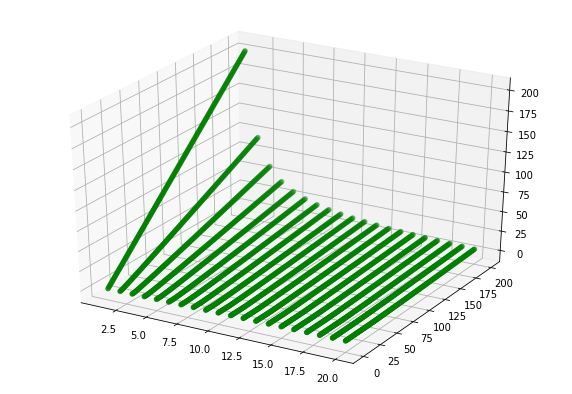

In [6]:
# 3d visualization 

Js = [x for y in range(1, len(dp_carts)) for x in range(0, len(dp_carts[0]))]
Is = [y for y in range(1, len(dp_carts)) for x in range(0, len(dp_carts[0]))]
Zs = [dp_carts[i][j] for (i, j) in zip(Is, Js)]

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(Is, Js, Zs, color = "green")


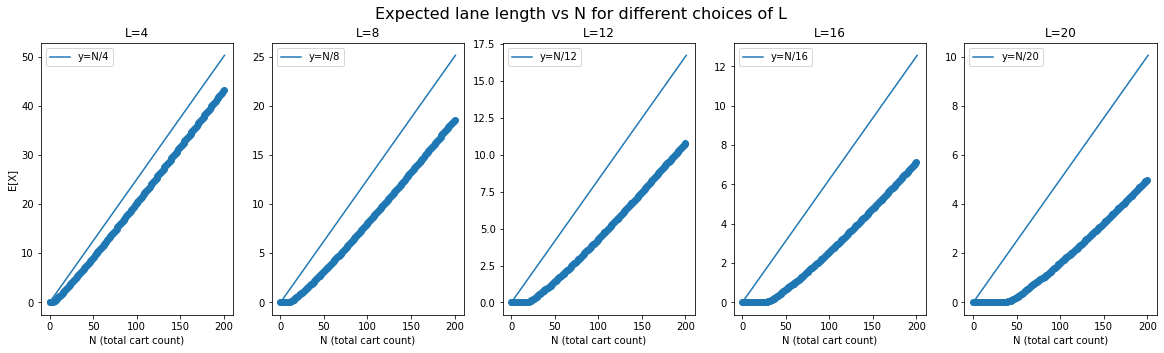

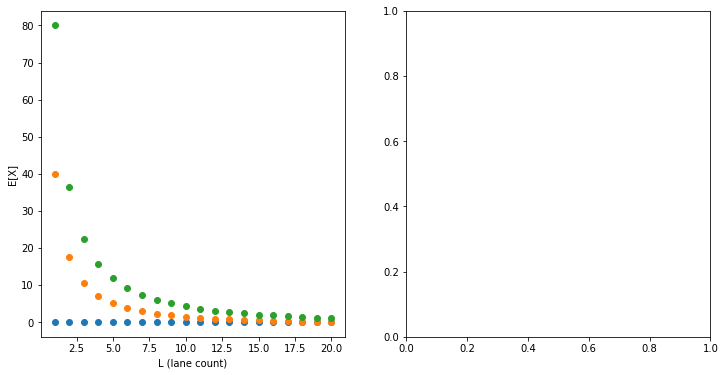

In [7]:
# Expected lane length vs N for different choices of L
step = 4
fig, axs = plt.subplots(1, math.floor((len(dp_carts))/step), figsize = (20, 5), sharex='col')
for i in range(1, math.floor(len(dp_carts)/step+1)):
    L = i * step
    ys = dp_carts[L]
    xs = range(0, len(dp_carts[L]))
    ax = axs[i-1]
    ax.scatter(xs, ys)
    ax.set_title("L=" + str(L))
    ax.set_xlabel("N (total cart count)")

    # add random chance line
    Ns = np.linspace(0, len(dp_carts[L]))
    ax.plot(Ns, Ns/L, "-", label="y=N/" + str(L))
    ax.legend()

fig.suptitle("Expected lane length vs N for different choices of L", fontsize=16)
axs[0].set_ylabel("E[X]")
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
step = 40
# first 5
for j in range(0, round(len(dp_carts[0])/(step*2))):
    N = step * j
    ys = [dp_carts[i][N] for i in range(0, len(dp_carts))]
    xs = range(0, len(dp_carts))
    axs[0].scatter(xs, ys, label="N=" + str(N))
    axs[0].set_xlabel("L (lane count)")
    axs[0].set_ylabel("E[X]")
plt.show()

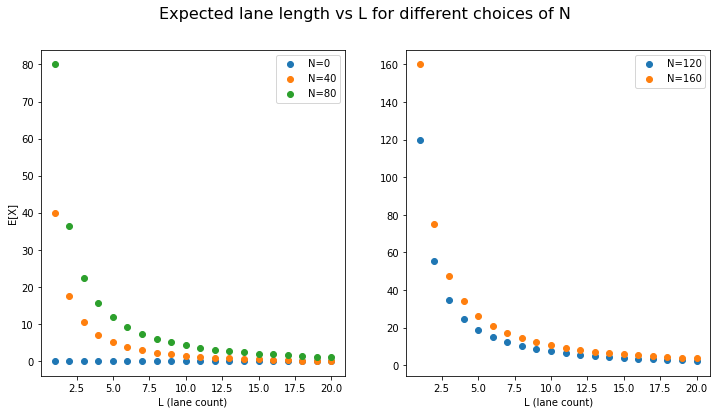

In [8]:
# Expected lane length vs L for different choices of N
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
step = 40
# first 5
for j in range(0, round(len(dp_carts[0])/(step*2))):
    N = step * j
    ys = [dp_carts[i][N] for i in range(0, len(dp_carts))]
    xs = range(0, len(dp_carts))
    axs[0].scatter(xs, ys, label="N=" + str(N))
    axs[0].set_xlabel("L (lane count)")
    axs[0].set_ylabel("E[X]")

# last 5
for j in range(round(len(dp_carts[0])/(step*2)), math.floor(len(dp_carts[0])/step)):
    N = step * j
    ys = [dp_carts[i][N] for i in range(0, len(dp_carts))]
    xs = range(0, len(dp_carts))
    axs[1].scatter(xs, ys, label="N=" + str(N))
    axs[1].set_xlabel("L (lane count)")
    
axs[0].legend()
axs[1].legend()
fig.suptitle("Expected lane length vs L for different choices of N", fontsize=16)
plt.show()

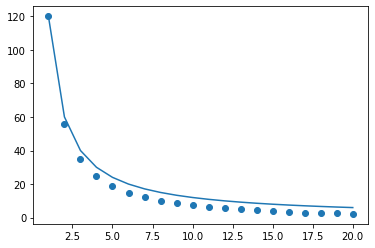

In [9]:
def graph_equation(formula, x_range):
    x = np.array(x_range)  
    y = formula(x)
    plt.plot(x, y)  

N = 120
ys = [dp_carts[i][N] for i in range(0, len(dp_carts))]
xs = range(0, len(dp_carts))
plt.scatter(xs, ys)
graph_equation(lambda L: N/L, xs)
plt.show()

# visual evidence that our optimal strategy performs better than random

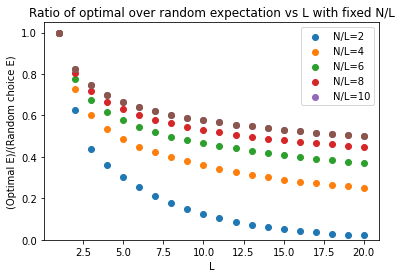

In [10]:
# what about keeping the ratio fixed?
step=2
for i in range(2, 10+1, step):
    xs = range(1, len(dp_carts))
    ys = [dp_carts[j][j*i]/i for j in xs]
    plt.scatter(xs, ys, label="N/L=" + str(i))

plt.scatter(xs, ys)
plt.ylim(ymin = 0)
plt.title("Ratio of optimal over random expectation vs L with fixed N/L")
plt.xlabel("L")
plt.ylabel("(Optimal E)/(Random choice E)")
plt.legend()
plt.show()

In [11]:
# Hmmm, is there a way to prove that the limit is 0 as number of lanes increases unbounded?

In [12]:
# Next question: How many lanes do you gotta check?

from checkout import expected_lanes_table

In [13]:
lanes = expected_lanes_table(dp_carts)

In [14]:
lane_df = pd.DataFrame(lanes).iloc[0:,:]
compact_lane_df = lane_df.iloc[::2, ::20]
compact_lane_df

,0,20,40,60,80,100,120,140,160,180,200
0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,1.000,1.412,1.437,1.449,1.456,1.460,1.464,1.466,1.469,1.470,1.472
4,1.000,2.510,2.381,2.529,2.481,2.566,2.540,2.494,2.477,2.557,2.535
6,1.000,3.617,3.481,3.418,3.443,3.635,3.631,3.623,3.619,3.473,3.486
8,1.000,4.735,4.627,4.576,4.559,4.582,4.641,4.679,4.488,4.536,4.589
10,1.000,5.356,5.753,5.225,5.639,5.415,5.624,5.586,5.493,5.664,5.595
12,1.000,4.739,5.656,6.129,6.481,6.674,6.645,6.438,6.596,6.679,6.565
14,1.000,3.954,8.027,7.756,7.681,7.633,7.686,7.673,7.627,7.604,7.380
16,1.000,3.361,8.440,7.410,8.401,8.767,8.720,8.696,8.635,8.590,8.556
18,1.000,2.949,7.789,9.854,9.639,8.860,9.440,9.728,9.675,9.474,9.286


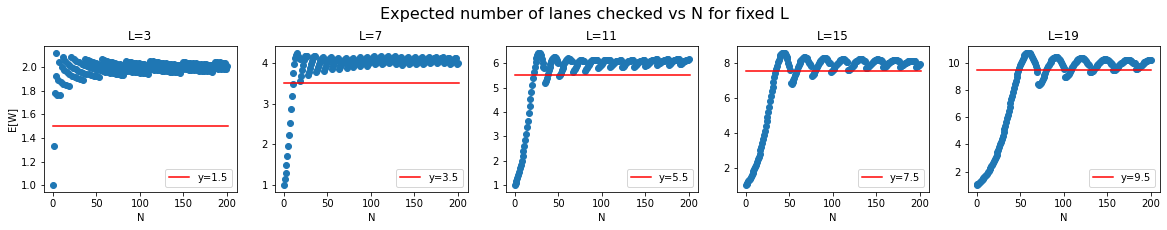

In [15]:
# Expected number of lanes checked vs N for fixed L
import matplotlib.pyplot as plt
import math
step = 4
start = 3
cut_lanes = lanes[start::step]
fig, axs = plt.subplots(1, len(cut_lanes), figsize = (20, 3))
for i in range(0, len(cut_lanes)):
    L = start + i * step
    ys = cut_lanes[i]
    xs = range(0, len(cut_lanes[i]))
    axs[i].scatter(xs, ys)
    axs[i].title.set_text("L=" + str(L))
    axs[i].set_xlabel("N")

    # add line
    x = np.linspace(0, len(cut_lanes[0]))
    axs[i].plot(x, [L/2 for k in x], "-r", label="y=" + str(L/2))
    axs[i].legend()

axs[0].set_ylabel("E[W]")
fig.suptitle("Expected number of lanes checked vs N for fixed L", fontsize=16)
fig.subplots_adjust(top=0.8)
plt.show()

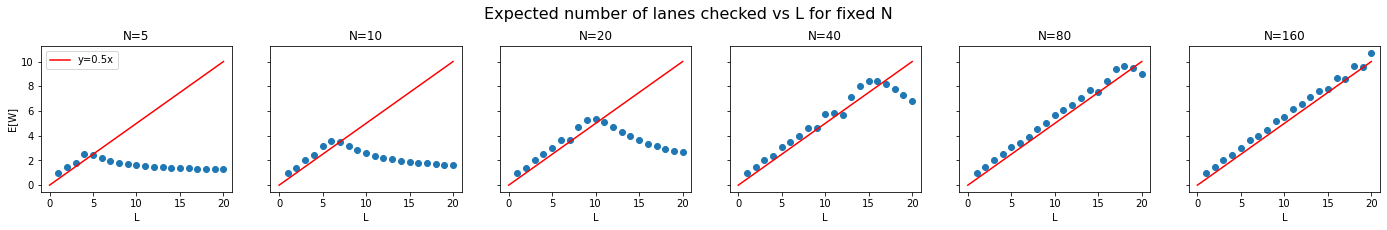

In [16]:
# Expected number of lanes checked vs L for fixed N

Ns = [5, 10, 20, 40, 80, 160]
cols = 6
rows = 1

fig, axs = plt.subplots(rows, cols, figsize = (cols * 4, rows * 3), sharey=True)
for j in range(0, len(Ns)):
    N = Ns[j]
    ys = [lanes[i][N] for i in range(0, len(lanes))]
    xs = range(0, len(lanes))
    axs[j].scatter(xs, ys)
    # add line
    x = np.linspace(0, 20)
    axs[j].plot(x, 0.5*x, '-r', label='y=0.5x')

    axs[j].set_xlabel("L")
    axs[j].set_title("N=" + str(N))

axs[0].set_ylabel("E[W]")
axs[0].legend()
fig.suptitle("Expected number of lanes checked vs L for fixed N", fontsize=16)
fig.subplots_adjust(top=0.8)
plt.show()
# for small N, the number expected number of carts actually decreases with increasing L, since it becomes more and more likely for the first lane to have 0 elements

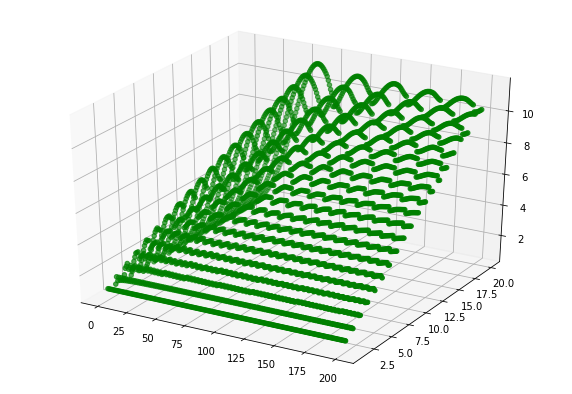

In [17]:
# 3d plot
Ns = [x for y in range(1, len(lanes)) for x in range(0, len(lanes[0]))]
Ls = [y for y in range(1, len(lanes)) for x in range(0, len(lanes[0]))]
Zs = [lanes[i][j] for (i, j) in zip(Is, Js)]

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(Ns, Ls, Zs, color = "green")